In [1]:
import numpy as np
import gym
import random
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [2]:
class Q_agent_oneshot(object):
    
    def __init__(self, n_states, n_actions,
                 greedy_eps = 1, 
                exploration_decay_rate = 0.001, 
                discount_rate = 0.99,
                lr = 0.1,
                min_exploration_rate = 0.001,
                max_exploration_rate = 1):
        
        
        self.greedy_eps0 = greedy_eps
        self.greedy_eps = self.greedy_eps0
        self.n_states = n_states
        self.n_actions = n_actions
        
        self.exploration_decay_rate = exploration_decay_rate
        self.discount_rate = discount_rate
        self.lr = lr
        self.min_exploration_rate = min_exploration_rate
        self.max_exploration_rate = max_exploration_rate
        
        self.old_state=None
        
        # initiliaze all q-table values to 0
        self.Q = np.zeros((self.n_states, self.n_actions))
        #
        
        
    def reset_Q(self, n_states, n_actions):
        self.Q = np.zeros(self.n_states, self.n_actions)
    
    def explore_step(self, observation, reward, t=0, episode=0):
        r = random.uniform(0, 1)
        
        if r > self.greedy_eps:
            # exploit 
            action = np.argmax(self.Q[observation, :])
            
        else:
            # explore (take a random action)
            action = np.random.randint(0,self.n_actions)
        
        if t>0:
            self.Q[self.old_state,action] = (1-self.lr)*self.Q[self.old_state,action] + self.lr*(reward + self.discount_rate * np.max(self.Q[observation, :]) )

            
        # update greedy eps
        self.greedy_eps = self.min_exploration_rate + (self.max_exploration_rate - self.min_exploration_rate) * np.exp(-self.exploration_decay_rate * episode)

        self.old_state = observation
        return action
        
    
    def action(self, observation, reward):
        
        pass
    
    

In [3]:
class Q_agent(object):
    """Basic Q-learning with epsilon-greedy policy."""
    
    def __init__(self, n_states, n_actions,
                 greedy_eps = 1, 
                exploration_decay_rate = 0.001, 
                discount_rate = 0.99,
                lr = 0.1,
                min_exploration_rate = 0.001,
                max_exploration_rate = 1):
        
        
        self.greedy_eps0 = greedy_eps
        self.greedy_eps = self.greedy_eps0
        self.n_states = n_states
        self.n_actions = n_actions
        
        self.exploration_decay_rate = exploration_decay_rate
        self.discount_rate = discount_rate
        self.lr = lr
        self.min_exploration_rate = min_exploration_rate
        self.max_exploration_rate = max_exploration_rate
        
        # initiliaze all Q-table values to 0
        self.Q = np.zeros((self.n_states, self.n_actions))
    
    
    def reset_Q(self, n_states, n_actions):
        self.Q = np.zeros(self.n_states, self.n_actions)
    
    
    def make_action(self, observation):
        r = random.uniform(0, 1)
        
        if r > self.greedy_eps:
            # exploit 
            action = np.argmax(self.Q[observation, :])
            
        else:
            # explore (take a random action)
            action = np.random.randint(0,self.n_actions)
        
        return action
    
    
    def update_table(self, old_state, new_state, reward, action, episode, t=0):
        self.Q[old_state,action] = (1-self.lr)*self.Q[old_state,action] + self.lr*(reward + self.discount_rate * np.max(self.Q[new_state, :]) )
        
        # update greedy eps
        self.greedy_eps = self.min_exploration_rate + (self.max_exploration_rate - self.min_exploration_rate) * np.exp(-self.exploration_decay_rate * episode)
    

In [6]:
def frozen_lake(n_episodes, n_timesteps=int(1e10), greedy_eps = 1, 
                exploration_decay_rate = 0.001, 
                discount_rate = 0.99,
                lr = 0.1,
                min_exploration_rate = 0.001,
                max_exploration_rate = 1):
    
    #create environment frozen lake
    env = gym.make("FrozenLake-v0")
    
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    
    #create agent
    agent = Q_agent(n_states,n_actions,greedy_eps, 
                exploration_decay_rate, 
                discount_rate,
                lr,
                min_exploration_rate,
                max_exploration_rate)
    reward=None
    
    
    #TODO create total reward
    reward_list = []
    
    #training of agent
    for episode in range(n_episodes):
        state = env.reset()
        total_reward = 0
        for timestep in range(n_timesteps):
            
            #env.render()
            #print(observation)
            
            action = agent.make_action(state)
            #print(agent.greedy_eps)
            observation, reward, done, info = env.step(action)
            agent.update_table(state, observation, reward, action, episode, timestep)
            state = observation
            
            # sum up the number of rewards after n episodes
            total_reward += reward
           
            if done:
                #print("Episode finished after {} timesteps".format(timestep + 1))
                break
        
        reward_list.append(total_reward)
    #print(np.cumsum(reward_list)/(np.arange(n_episodes) + 1))
    plt.figure(figsize=(14,10))
    plt.plot((np.arange(n_episodes) + 1), np.cumsum(reward_list)/(np.arange(n_episodes) + 1))
    plt.show()
    env.close()
    return reward_list

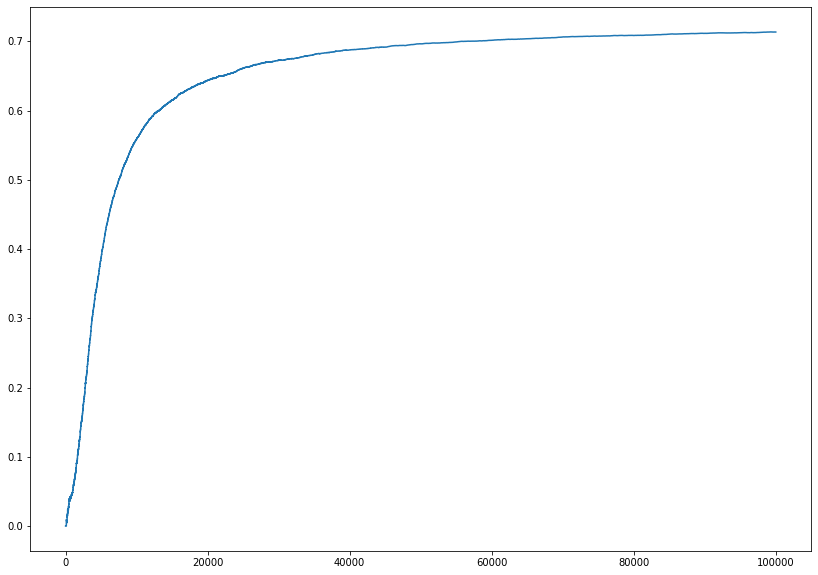

In [8]:
rewards=frozen_lake(100000)